In [61]:
import pandas as pd
import json
import numpy as np
import glob
from pymoo.indicators.igd import IGD
from pymoo.indicators.hv import HV
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('pdf', fonttype=42)
sns.set(font_scale=1.25, style='whitegrid')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#df_plotPenalty = pd.read_csv("blackboxTIRMOO.csv")
df_plotPenalty = pd.read_csv("gpem_results.csv")
fname = "tirmoo"

f = open("points_dataset")
datasets = [l.strip() for l in f.readlines()]
f.close()

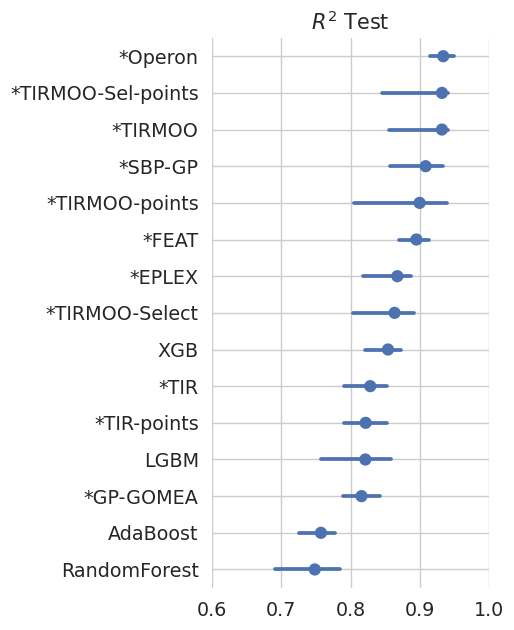

In [62]:
# Make the PairGrid
sns.set_style("whitegrid")


# different options
x_vars=[
        'r2_test',
        #'rmse_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty
#dfg = df_p[df_p.algorithm == 'TIRMOO2'].groupby('dataset')[x_vars[0]].median()
#df_p = df_p[df_p.dataset.isin(dfg.index)]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      #size=10,
      orient="h",
      #jitter=False,
      order=order,
      palette="rocket",
      #linewidth=1,
      #markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      errorbar=('ci', 95)
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','$R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([.6,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig(f"figs/{fname}_results.pdf", bbox_inches='tight')


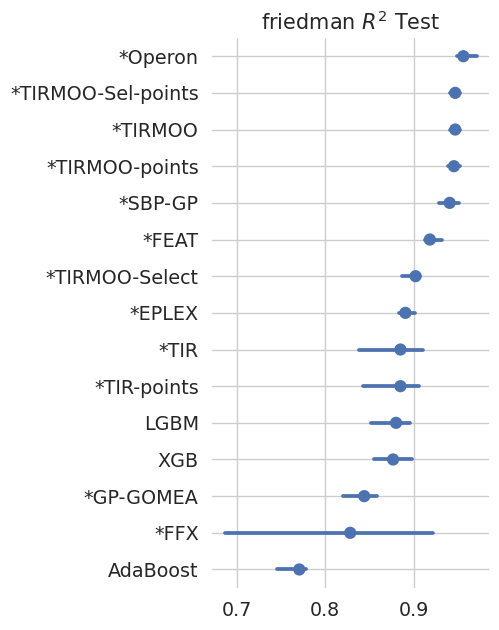

In [63]:
# Make the PairGrid
sns.set_style("whitegrid")

# different options
x_vars=[
        'r2_test',
        #'log_mse_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty[df_plotPenalty.dataset.str.contains("_fri_")]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      #size=10,
      orient="h",
      #jitter=False,
      order=order,
      palette="rocket",
      #linewidth=1,
      #markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      errorbar=('ci', 95)
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig(f"figs/{fname}_fri_results.pdf", bbox_inches='tight')

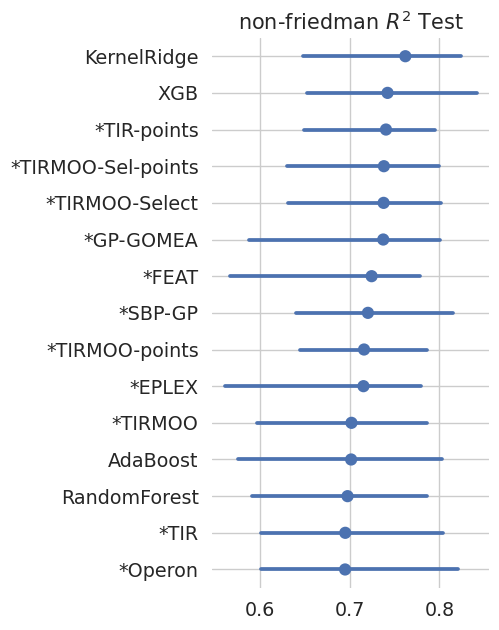

In [64]:
# Make the PairGrid
sns.set_style("whitegrid")

#smallests = ["192_vineyard", "228_elusage", "485_analcatdata_vehicle", "1096_FacultySalaries", 
#             "523_analcatdata_neavote", "663_rabe_266", "687_sleuth_ex1605", "659_sleuth_ex1714",
#             "678_visualizing_environmental", "611_fri_c3_100_5", "594_fri_c2_100_5", "624_fri_c0_100_5",
#             "656_fri_c1_100_5", "210_cloud", "706_sleuth_case1202", "1089_USCrime", "712_chscase_geyser1",
#             "542_pollution", "527_analcatdata_election2000"]

# different options
x_vars=[
        'r2_test',
        #'log_mse_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty[~df_plotPenalty.dataset.str.contains("_fri_")]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      #size=10,
      orient="h",
      #jitter=False,
      order=order,
      palette="rocket",
      #linewidth=1,
      #markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      errorbar=('ci', 95)
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','non-friedman $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig(f"figs/{fname}_nonfri_results.pdf", bbox_inches='tight')

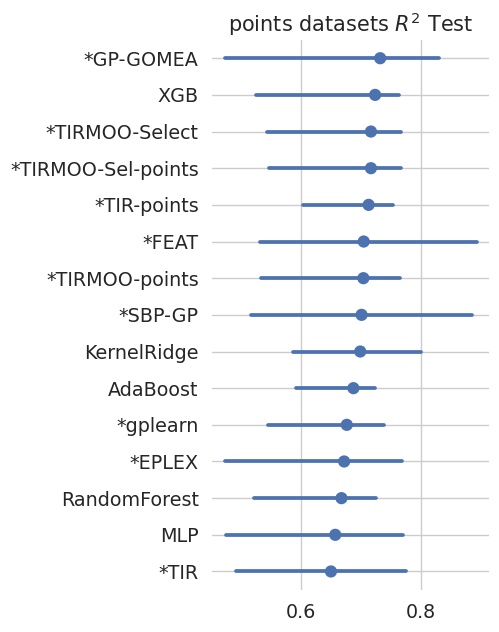

In [65]:
# Make the PairGrid
sns.set_style("whitegrid")

smallests = ["192_vineyard", "228_elusage", "485_analcatdata_vehicle", "1096_FacultySalaries", 
             "523_analcatdata_neavote", "663_rabe_266", "687_sleuth_ex1605", "659_sleuth_ex1714",
             "678_visualizing_environmental", "611_fri_c3_100_5", "594_fri_c2_100_5", "624_fri_c0_100_5",
             "656_fri_c1_100_5", "210_cloud", "706_sleuth_case1202", "1089_USCrime", "712_chscase_geyser1",
             "542_pollution"]




# different options
x_vars=[
        'r2_test',
        #'log_mse_test',
        #'model_size',
        #'training time (s)',
]

df_p = df_plotPenalty[df_plotPenalty.dataset.isin(smallests)]

order = df_p.groupby('algorithm')[x_vars[0]].median().sort_values(ascending=False).index[:15]
g = sns.PairGrid(df_p, 
                 x_vars=x_vars,
                 y_vars=['algorithm'],
                 height=6.5, 
                 aspect=0.6,
                )

# Draw a dot plot 
g.map(sns.pointplot, 
      #size=10,
      orient="h",
      #jitter=False,
      order=order,
      palette="rocket",
      #linewidth=1,
      #markeredgecolor='w',
      join=False,
      estimator=np.median,
      n_boot=1000,
      errorbar=('ci', 95)
     )
# # Use semantically meaningful titles for the columns
titles = [x.replace('_',' ').title().replace('(S)','(s)').replace('R2','points datasets $R^2$') for x in x_vars]
g.axes.flat[0].set_ylabel('')
for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    ax.set_xlabel('')
    
    if any([n in title.lower() for n in ['size','time']]):
        ax.set_xscale('log')
    
    if title == '$R^2$ Test':
        ax.set_xlim([-.25,1])

    # Make the grid horizontal instead of vertical
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

#save(name='_'.join(['pairgrid-pointplot']+x_vars))
plt.savefig(f"figs/{fname}_points_results.pdf", bbox_inches='tight')

,dataset,random_seed,r2_train,r2_test,r2_train - r2_test
4,547_no2,860,0.637902,0.420648,1.516476e+00
107,594_fri_c2_100_5,5390,0.801560,0.500105,1.602785e+00
119,665_sleuth_case2002,11284,0.537773,-515.356603,5.377731e+09
156,678_visualizing_environmental,11284,0.503852,0.293116,1.718952e+00
182,1028_SWD,11964,0.523837,0.271979,1.926024e+00
232,547_no2,15795,0.642751,0.342088,1.878907e+00
256,542_pollution,5390,0.874701,-0.317944,8.747011e+09
273,192_vineyard,11284,0.920731,0.262199,3.511577e+00
344,687_sleuth_ex1605,11964,0.903482,-0.275242,9.034819e+09
461,210_cloud,6265,0.952322,0.485989,1.959555e+00


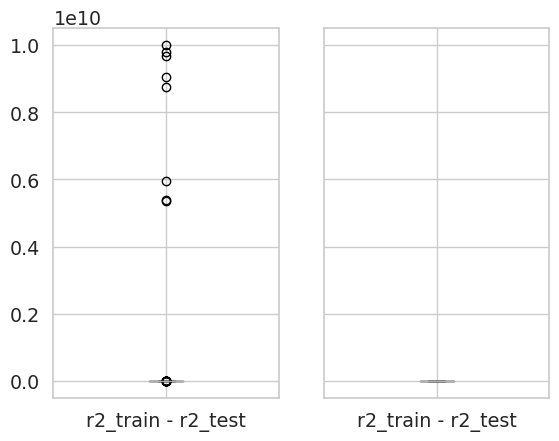

In [35]:
sns.set_style("whitegrid")

smallests = ["192_vineyard", "228_elusage", "485_analcatdata_vehicle", "1096_FacultySalaries", 
             "523_analcatdata_neavote", "663_rabe_266", "687_sleuth_ex1605", "659_sleuth_ex1714",
             "678_visualizing_environmental", "611_fri_c3_100_5", "594_fri_c2_100_5", "624_fri_c0_100_5",
             "656_fri_c1_100_5", "210_cloud", "706_sleuth_case1202", "1089_USCrime", "712_chscase_geyser1",
             "542_pollution", "527_analcatdata_election2000"]




# different options
x_vars=[
        'r2_test',
        #'log_mse_test',
        #'model_size',
        #'training time (s)',
]

df_over = pd.read_csv("overfit.csv")

fig, axes = plt.subplots(1,2, sharey=True)

df_p['r2_train - r2_test'] = df_p.r2_train / np.clip(df_p.r2_test, 1e-10, 1)
df_p.loc[df_plotPenalty.dataset.isin(smallests)].boxplot('r2_train - r2_test', showfliers=False, ax=axes[1])
df_p.boxplot('r2_train - r2_test', showfliers=True, ax=axes[0])
df_p[df_p['r2_train - r2_test'] > 1.5]

KruskalResult(statistic=0.0033933657028496354, pvalue=1.0)
(5.514390827605774, 1.0, 8.0, array([[7, 7, 8, 7, 7, 8, 7, 8, 7, 7, 7, 8, 7, 7, 7, 7, 8, 7, 7, 7, 6, 7,
        8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 6, 7, 7, 8, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 8, 8, 7, 8, 7, 7, 8, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 8, 7, 8, 8, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7],
       [8, 8, 7, 8, 8, 7, 8, 7, 8, 8, 8, 7, 8, 8, 8, 8, 7, 8, 8, 8, 9, 8,
        7, 8, 8, 8, 8, 8, 8, 8, 7, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 9, 8, 8, 7, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 7, 7, 8, 7, 8, 8, 7, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 7, 8, 7, 7, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8]]))


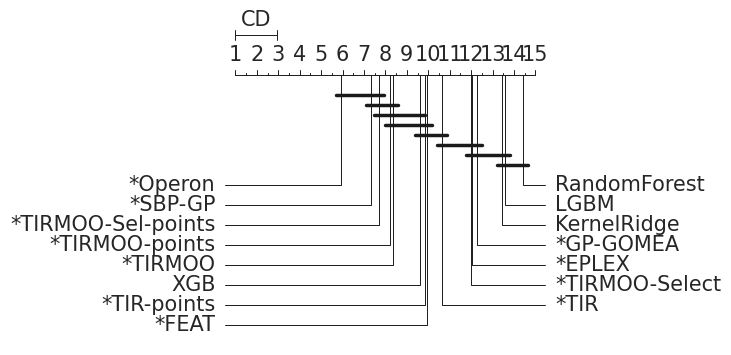

In [66]:
import Orange
from scipy.stats import kruskal, median_test

# critical difference for Nemenyi with alpha=0.05
def cd_plot(df, pname):
    df_pivot = pd.pivot_table(df, index='algorithm', columns=['dataset'], values='r2_test')
    n = len(df_pivot.columns)
    ranks = df_pivot.rank(ascending=False).mean(axis=1).sort_values(ascending=True)    
    names = ranks.index.values[:15]
    avranks = ranks.values[:15]
    kranks = list(df_pivot.loc[names].rank(ascending=False).values.T)
    print(kruskal(*kranks))
    print(median_test(*kranks))

    cd = Orange.evaluation.compute_CD(avranks, n)
    Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5)
    plt.savefig(pname, bbox_inches='tight')
        
cd_plot(df_plotPenalty, f"figs/{fname}_cd_results.pdf")

KruskalResult(statistic=0.001792209464264542, pvalue=1.0)
(2.775553331108886, 1.0, 8.0, array([[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 6, 7, 7, 7, 8, 8, 7,
        8, 7, 7, 7, 7, 7, 8, 7, 8, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 8, 7, 8,
        7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 9, 8, 8, 8, 7, 7, 8,
        7, 8, 8, 8, 8, 8, 7, 8, 7, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 7, 8, 7,
        8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8]]))


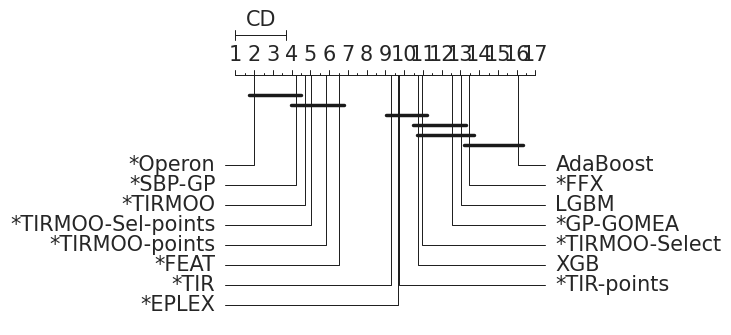

In [67]:
cd_plot(df_plotPenalty[df_plotPenalty.dataset.str.contains("_fri_")], f"figs/{fname}_cd_fri_results.pdf")

KruskalResult(statistic=0.0029427349877328562, pvalue=1.0)
(5.083333746572185, 1.0, 8.0, array([[7, 6, 8, 6, 7, 8, 6, 8, 7, 7, 7, 7, 8, 7, 8, 7, 7, 7, 7, 8, 6, 7,
        7, 7, 7, 7, 7, 6, 7, 7, 6, 7, 8, 7, 7, 7, 6, 8, 7, 7, 7, 7, 7, 7,
        7, 7, 8, 6, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 6, 7],
       [8, 9, 7, 9, 8, 7, 9, 7, 8, 8, 8, 8, 7, 8, 7, 8, 8, 8, 8, 7, 9, 8,
        8, 8, 8, 8, 8, 9, 8, 8, 9, 8, 7, 8, 8, 8, 9, 7, 8, 8, 8, 8, 8, 8,
        8, 8, 7, 9, 8, 8, 8, 8, 8, 7, 8, 8, 8, 8, 9, 8]]))


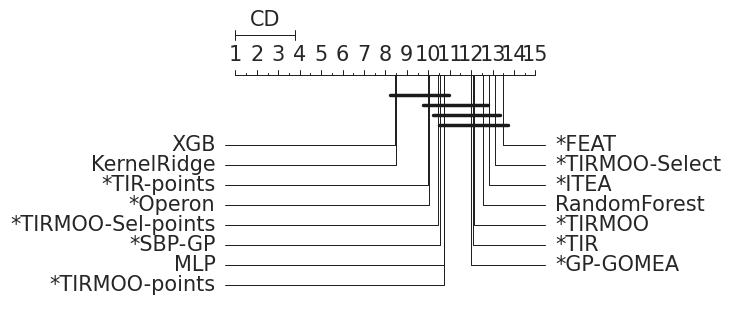

In [68]:
cd_plot(df_plotPenalty[~df_plotPenalty.dataset.str.contains("_fri_")],f"figs/{fname}_cd_nonfri_results.pdf")


KruskalResult(statistic=7.676243509504171e-05, pvalue=1.0)
(0.4753521126760563, 0.9999999999663474, 8.0, array([[7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 8, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8, 7, 8, 8, 8, 8]]))


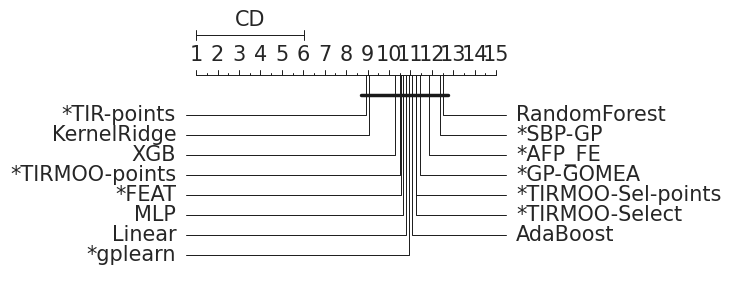

In [69]:
cd_plot(df_plotPenalty[df_plotPenalty.dataset.isin(smallests)],f"figs/{fname}_cd_points_results.pdf")


In [10]:
# taken from srbench analysis scripts
def check_dominance(p1,p2):

    flag1 = 0
    flag2 = 0

    for o1,o2 in zip(p1,p2):
        if o1 < o2:
            flag1 = 1
        elif o1 > o2:
            flag2 = 1

    if flag1==1 and flag2 == 0:
        return 1
    elif flag1==0 and flag2 == 1:
        return -1
    else:
        return 0

def front(obj1,obj2):
    """return indices from x and y that are on the Pareto front."""
    rank = []
    assert(len(obj1)==len(obj2))
    n_inds = len(obj1)
    front = []

    for i in np.arange(n_inds):
        p = (obj1[i],obj2[i])
        dcount = 0
        dom = []
        for j in np.arange(n_inds):
            q = (obj1[j],obj2[j])
            compare = check_dominance(p,q)
            if compare == 1:
                dom.append(j)
#                 print(p,'dominates',q)
            elif compare == -1:
                dcount = dcount +1
#                 print(p,'dominated by',q)

        if dcount == 0:
#             print(p,'is on the front')
            front.append(i)

#     f_obj1 = [obj1[f] for f in front]
    f_obj2 = [obj2[f] for f in front]
#     s1 = np.argsort(np.array(f_obj1))
    s2 = np.argsort(np.array(f_obj2))
#     front = [front[s] for s in s1]
    front = [front[s] for s in s2]

    return front

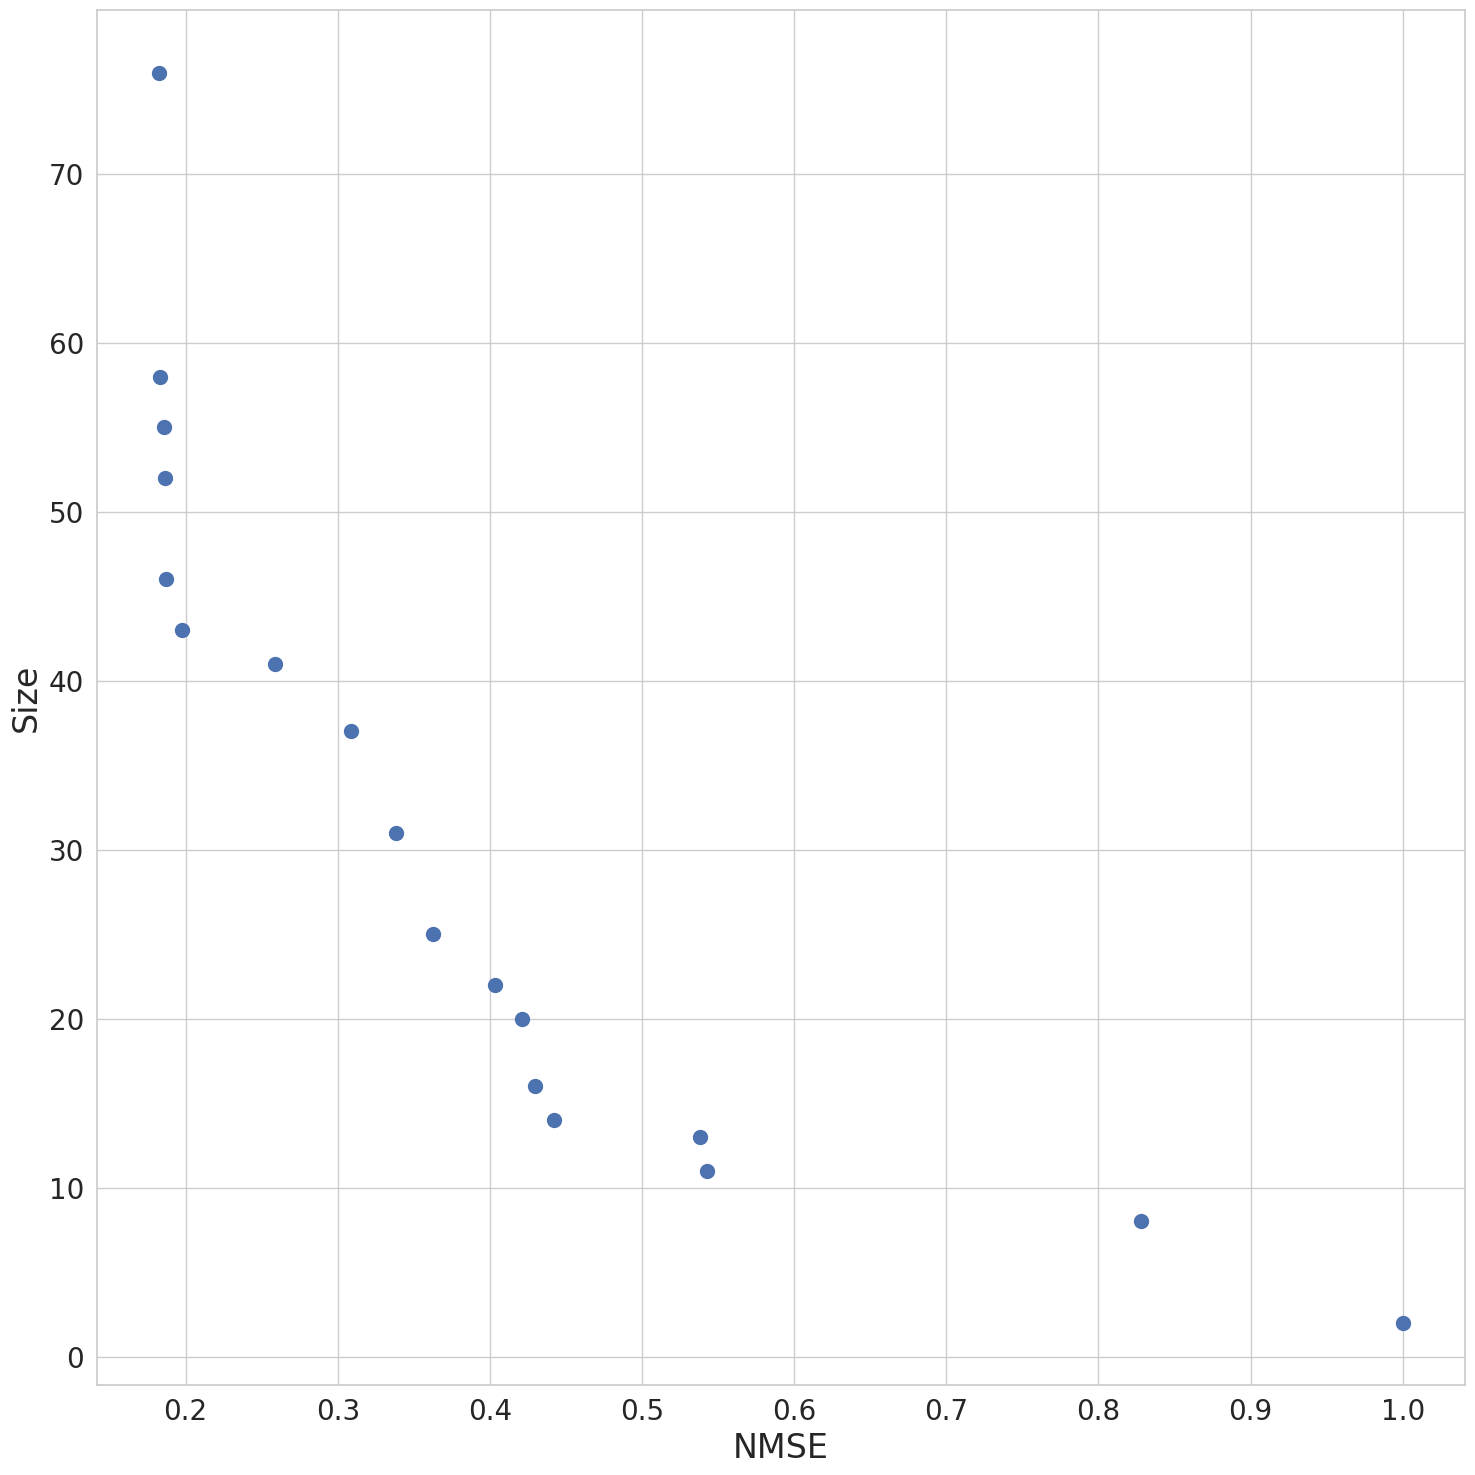

In [11]:
lines = open("front.csv").readlines()

def extract_objs(x):
    objs = x.split()[0].split(',')
    return float(objs[0][1:]), float(objs[1][:-1])

zs = [extract_objs(z) for z in lines]
x = np.array([z[0] for z in zs])
y = np.array([z[1] for z in zs])

ix = front(x,y)

plt.figure(figsize=(15,15))
plt.plot(x[ix], y[ix], '.', markersize=20)
plt.xlabel("NMSE", fontsize=24)
plt.ylabel("Size", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
#plt.show()
plt.savefig("figs/pareto.pdf")

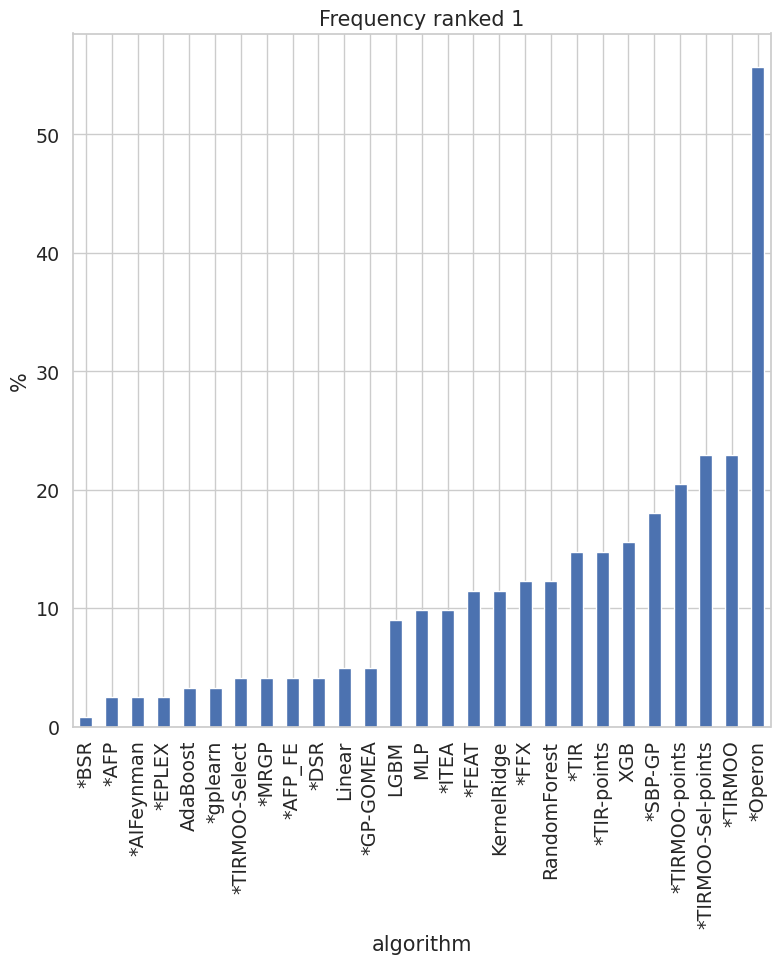

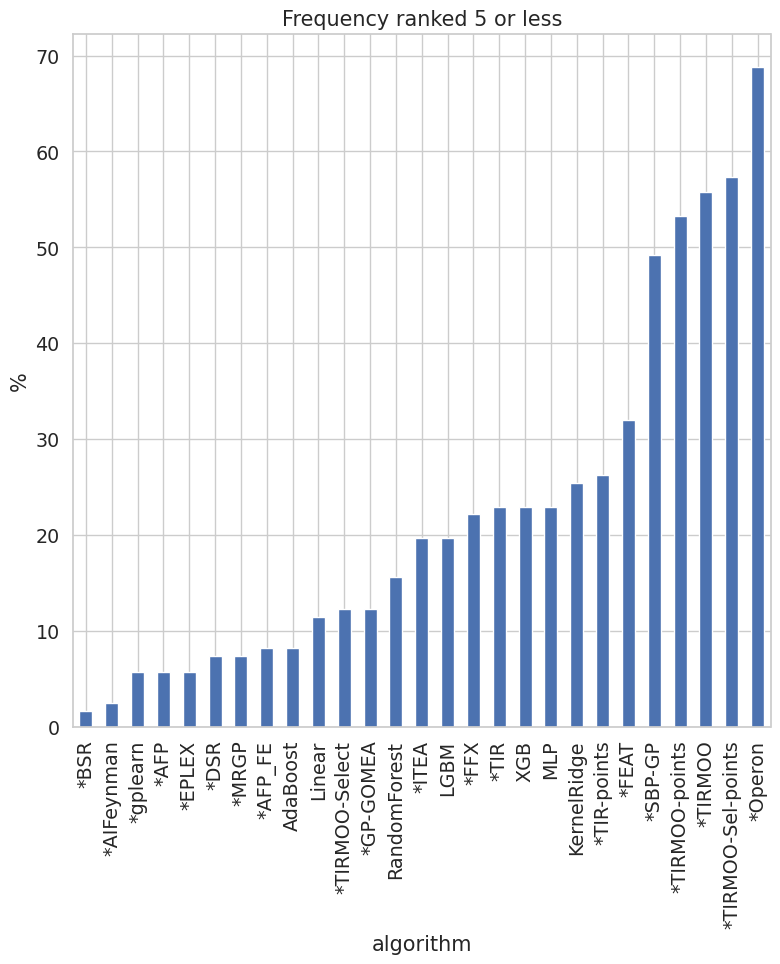

In [70]:
df_pivot = pd.pivot_table(df_plotPenalty, index='algorithm', columns=['dataset'], values='r2_test').apply(lambda x: np.round(x,2))
ranks = df_pivot.rank(ascending=False, method='min')
plt.rcParams.update({'font.size': 30, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})
n = len(ranks.columns)

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 2 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 1')
plt.savefig('figs/hist1.pdf', bbox_inches="tight")

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 5 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 5 or less')
plt.savefig('figs/hist5.pdf', bbox_inches="tight")

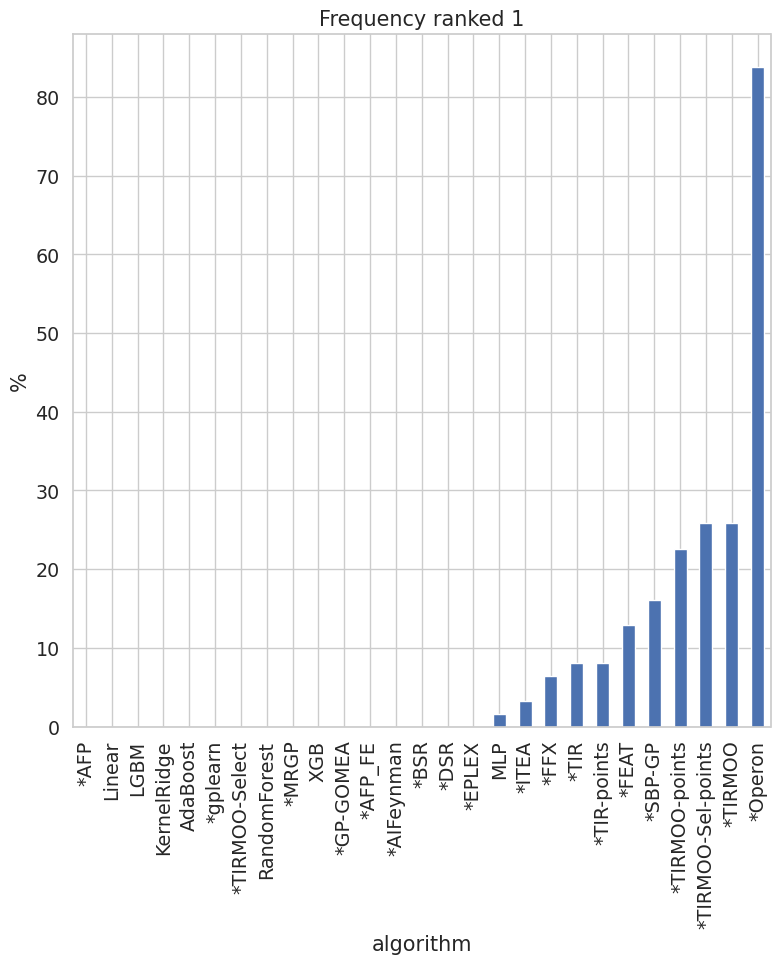

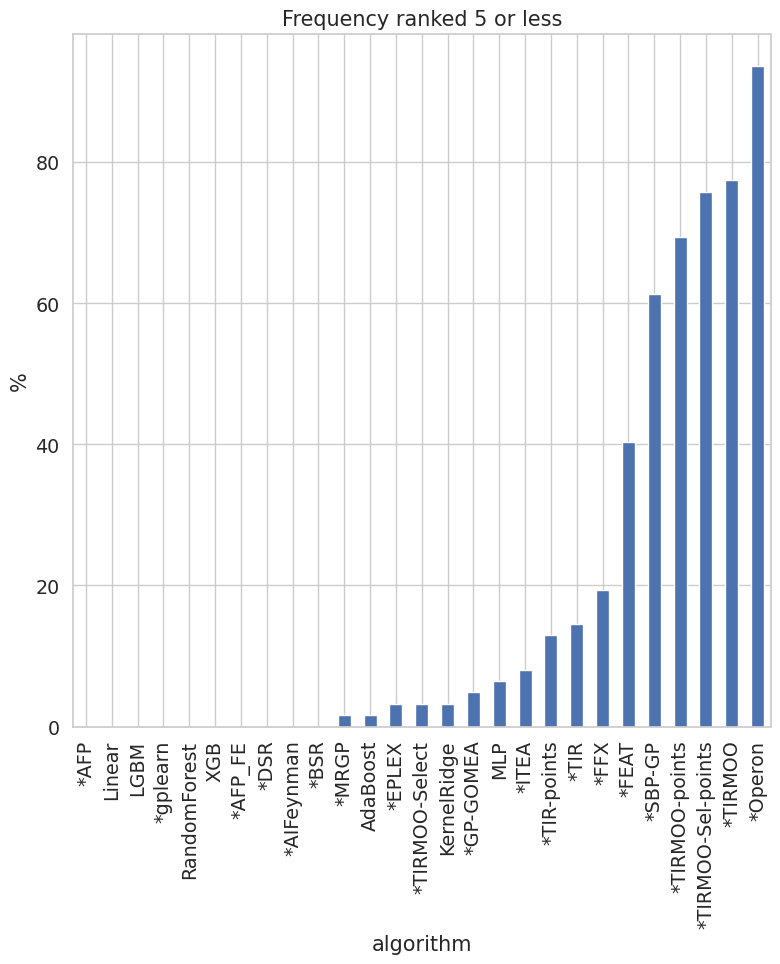

In [71]:
df_pivot = pd.pivot_table(df_plotPenalty[df_plotPenalty.dataset.str.contains("_fri_")], index='algorithm', columns=['dataset'], values='r2_test').apply(lambda x: np.round(x,2))
ranks = df_pivot.rank(ascending=False, method='min')
plt.rcParams.update({'font.size': 30, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})
n = len(ranks.columns)

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 2 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 1')
plt.savefig('figs/hist1fri.pdf', bbox_inches="tight")

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 5 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 5 or less')
plt.savefig('figs/hist5fri.pdf', bbox_inches="tight")

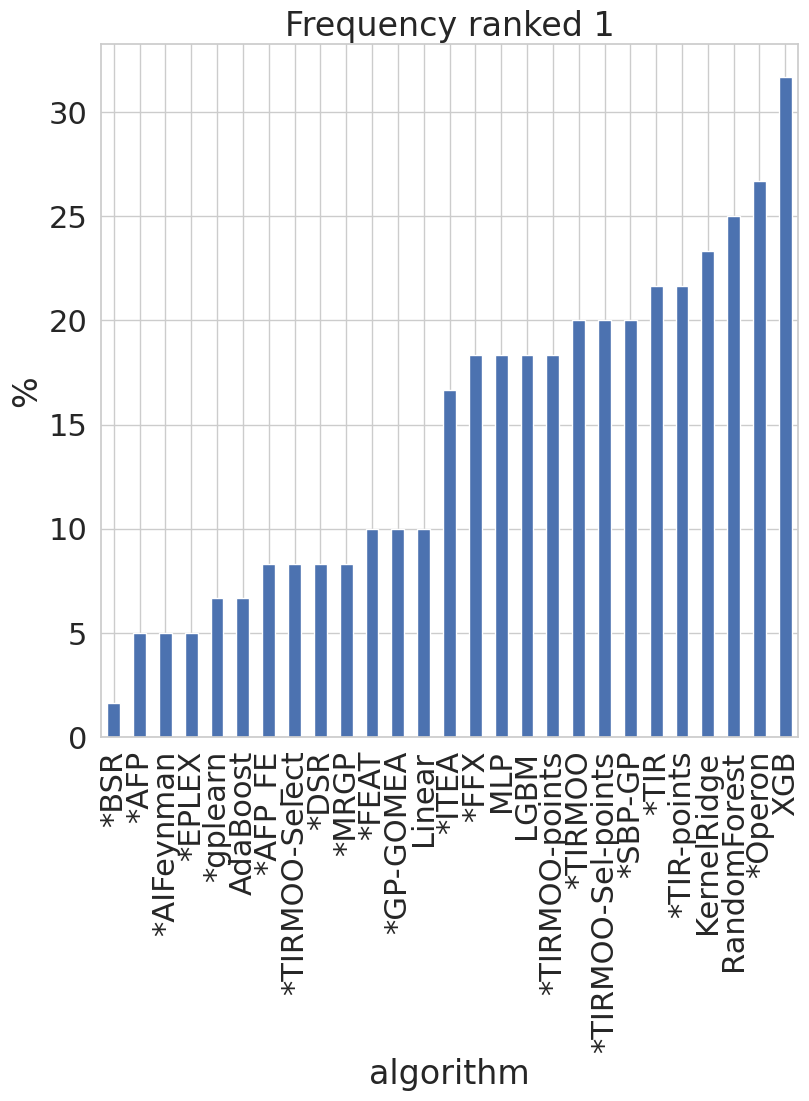

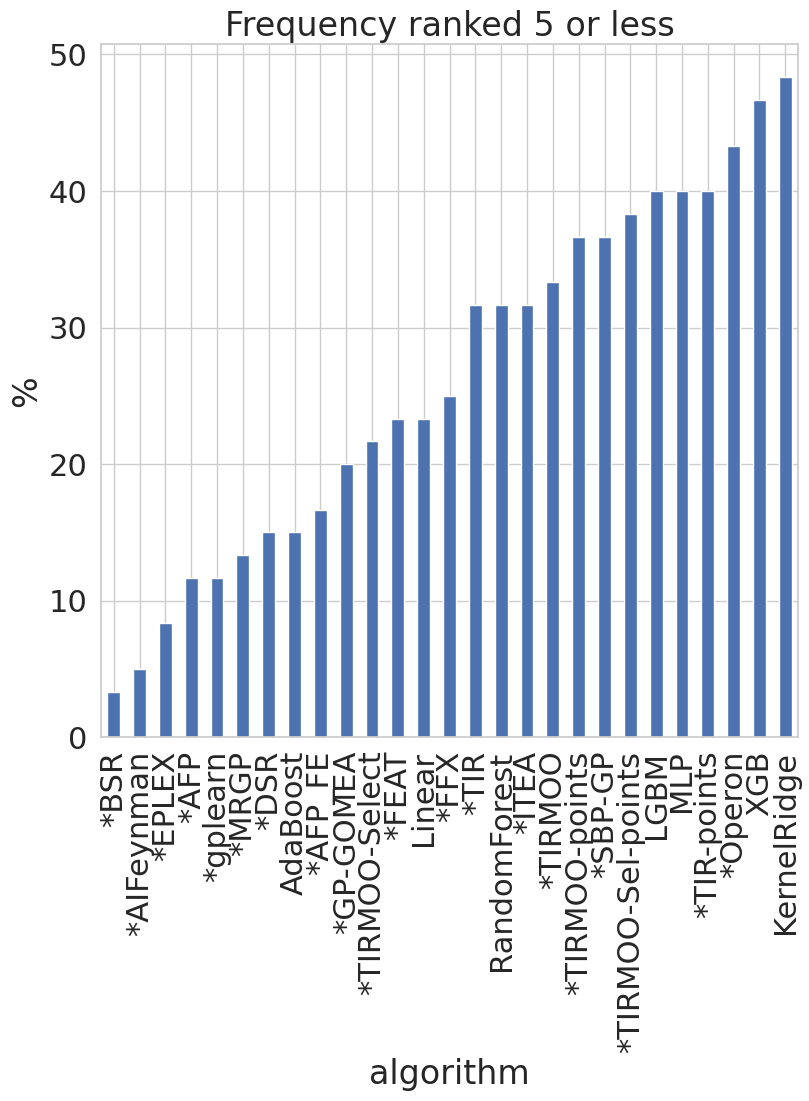

In [72]:
df_pivot = pd.pivot_table(df_plotPenalty[~df_plotPenalty.dataset.str.contains("_fri_")], index='algorithm', columns=['dataset'], values='r2_test').apply(lambda x: np.round(x,2))
ranks = df_pivot.rank(ascending=False, method='min')
plt.rcParams.update({'font.size': 30, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})
sns.set(font_scale=2)
sns.set_style("whitegrid")
n = len(ranks.columns)

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 2 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 1')
plt.savefig('figs/hist1nonfri.pdf', bbox_inches="tight")

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 5 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 5 or less')
plt.savefig('figs/hist5nonfri.pdf', bbox_inches="tight")

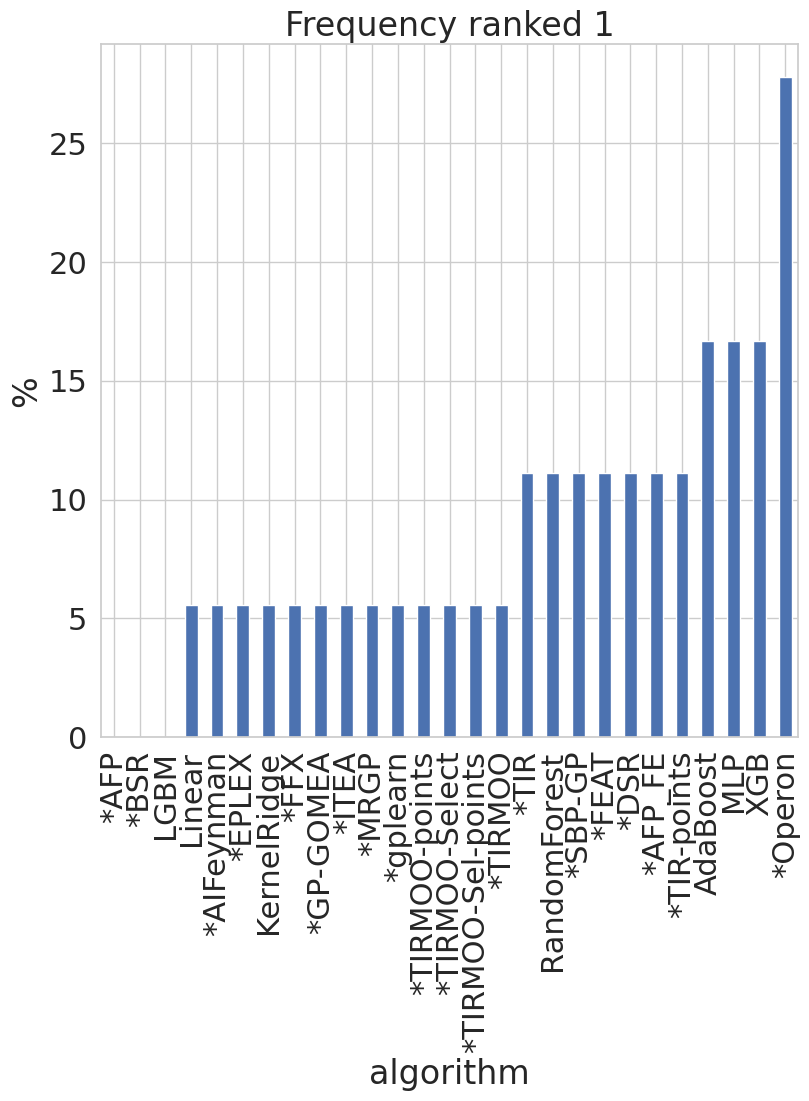

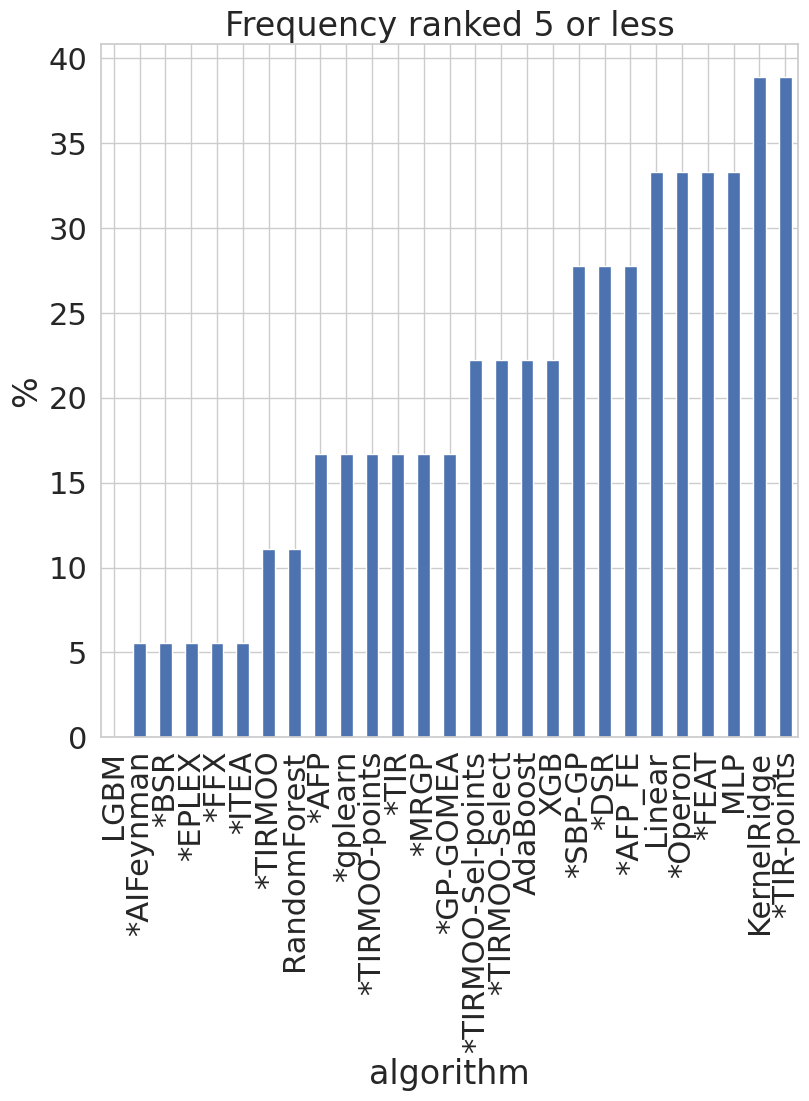

In [76]:
df_pivot = pd.pivot_table(df_plotPenalty[df_plotPenalty.dataset.isin(smallests)], index='algorithm', columns=['dataset'], values='r2_test').apply(lambda x: np.round(x,2))
ranks = df_pivot.rank(ascending=False, method='min')
plt.rcParams.update({'font.size': 30, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})
sns.set(font_scale=2)
sns.set_style("whitegrid")
n = len(ranks.columns)

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 2 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 1')
plt.savefig('figs/hist1points.pdf', bbox_inches="tight")

plt.figure(figsize=(9,9))
ranks.apply(lambda xs: np.array([100.0/n if x < 5 else 0 for x in xs]).sum(), axis=1).sort_values().plot.bar(ylabel='%', title='Frequency ranked 5 or less')
plt.savefig('figs/hist5points.pdf', bbox_inches="tight")

<Figure size 1200x1200 with 0 Axes>

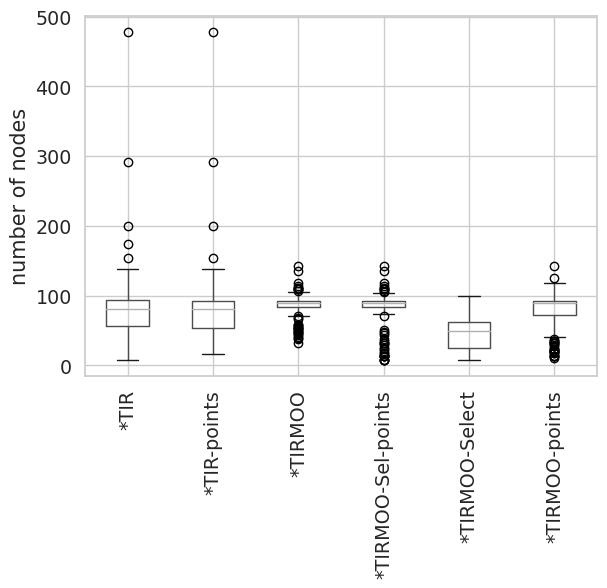

In [79]:
plt.rcParams.update({'font.size': 16, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})
sns.set(font_scale=1.25, style='whitegrid')

plt.figure(figsize=(12,12))

(df_plotPenalty[df_plotPenalty.algorithm.isin(['*TIR', '*TIR-points', '*TIRMOO', '*TIRMOO-points', '*TIRMOO-Select', '*TIRMOO-Sel-points'])]
 .boxplot('model_size', by='algorithm', rot=90))
plt.title("")
plt.suptitle("")
plt.xlabel("")
plt.ylabel("number of nodes")
plt.savefig("figs/sizecomparison.pdf", bbox_inches="tight")

<Figure size 1200x1200 with 0 Axes>

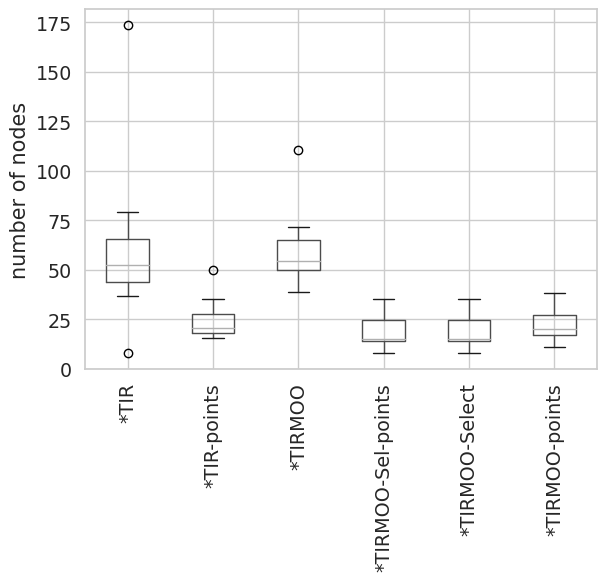

In [80]:
plt.rcParams.update({'font.size': 16, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})
sns.set(font_scale=1.25, style='whitegrid')

plt.figure(figsize=(12,12))

(df_plotPenalty[(df_plotPenalty.algorithm.isin(['*TIR', '*TIR-points', '*TIRMOO', '*TIRMOO-points', '*TIRMOO-Select', '*TIRMOO-Sel-points'])) & (df_plotPenalty.dataset.isin(smallests))]
 .boxplot('model_size', by='algorithm', rot=90))
plt.title("")
plt.suptitle("")
plt.xlabel("")
plt.ylabel("number of nodes")
plt.savefig("figs/sizecomparison_points.pdf", bbox_inches="tight")

<Figure size 1200x1200 with 0 Axes>

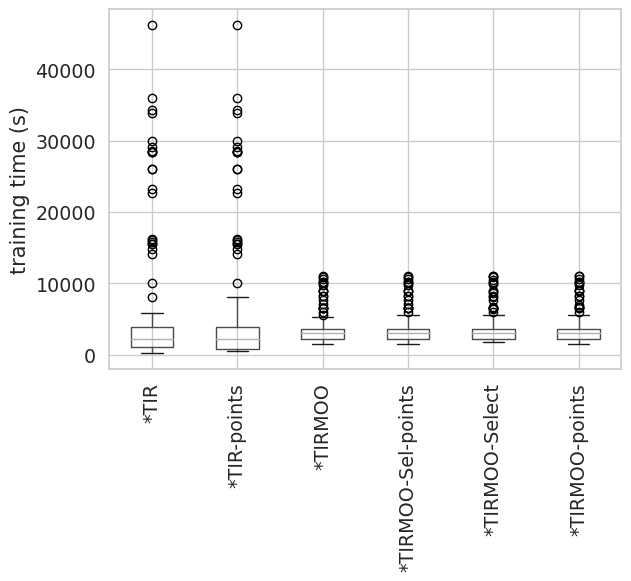

In [75]:
plt.rcParams.update({'font.size': 16, 'pdf.fonttype' : 42, 'ps.fonttype' : 42})
sns.set(font_scale=1.25, style='whitegrid')

plt.figure(figsize=(12,12))

#df_plotPenalty.loc[df_plotPenalty.algorithm == "*TIRMOO",'training time (s)'] *= 3
#df_plotPenalty.loc[df_plotPenalty.algorithm == "*TIRMOO-points",'training time (s)'] *= 3
#df_plotPenalty.loc[df_plotPenalty.algorithm == "*TIRMOO-Select",'training time (s)'] *= 3
#df_plotPenalty.loc[df_plotPenalty.algorithm == "*TIRMOO-Sel-points",'training time (s)'] *= 3


(df_plotPenalty[df_plotPenalty.algorithm.isin(['*TIR', '*TIR-points', '*TIRMOO', '*TIRMOO-points', '*TIRMOO-Select', '*TIRMOO-Sel-points'])]
 .boxplot('training time (s)', by='algorithm', rot=90))
plt.title("")
plt.suptitle("")
plt.xlabel("")
plt.ylabel("training time (s)")
plt.savefig("figs/timecomparison.pdf", bbox_inches="tight")

In [38]:
df_plotPenalty[df_plotPenalty.algorithm == "*TIR"].model_size.values.max()

477.5

In [56]:
selection = ["687_sleuth_ex1605",
"659_sleuth_ex1714",
"678_visualizing_environmental",
"594_fri_c2_100_5",
"210_cloud",
"706_sleuth_case1202",
"579_fri_c0_250_5",
"613_fri_c3_250_5",
"596_fri_c2_250_5",
"601_fri_c1_250_5"]

ref = np.array([1, 1])
hv = HV(ref_point=ref)

for sel in selection:
    hvs1 = []
    hvs2 = []
    hvs3 = []
    for fname in glob.glob(f"fronts/{sel}*TIRMOO_front*.csv"):
        df_front = pd.read_csv(fname, sep=";", header=None).values[:,[1,2]]
        ix = front(df_front[:,0], df_front[:,1])
        df_front = df_front[ix,:]
        df_front[:,0] = 1 - np.abs(np.clip(df_front[:,0], -1, 0))
        df_front[:,1] /= 500
        hvs1.append(hv(df_front))
    for fname in glob.glob(f"fronts/{sel}*TIRMOO_point*.csv"):
        df_front = pd.read_csv(fname, sep=";", header=None).values[:,[1,2]]
        ix = front(df_front[:,0], df_front[:,1])
        df_front = df_front[ix,:]
        df_front[:,0] = 1 - np.abs(np.clip(df_front[:,0], -1, 0))
        df_front[:,1] /= 500        
        hvs2.append(hv(df_front))
    #for fname in glob.glob(f"fronts/{sel}*TIRMOO_selfront*.csv"):
    #    df_front = pd.read_csv(fname, sep=";", header=None).values[:,[1,2]]
    #    df_front[:,1] /= 500
    #    hvs3.append(hv(df_front))
    print(f"{sel} & ${np.mean(hvs1):.2f} \\pm {np.std(hvs1):.2f}$ & ${np.mean(hvs2):.2f} \\pm {np.std(hvs2):.2f}$ \\\\")

687_sleuth_ex1605 & $0.87 \pm 0.02$ & $0.71 \pm 0.04$ \\
659_sleuth_ex1714 & $0.96 \pm 0.00$ & $0.90 \pm 0.02$ \\
678_visualizing_environmental & $0.66 \pm 0.04$ & $0.47 \pm 0.05$ \\
594_fri_c2_100_5 & $0.80 \pm 0.02$ & $0.74 \pm 0.02$ \\
210_cloud & $0.94 \pm 0.01$ & $0.90 \pm 0.02$ \\
706_sleuth_case1202 & $0.87 \pm 0.02$ & $0.79 \pm 0.02$ \\
579_fri_c0_250_5 & $0.92 \pm 0.00$ & $0.80 \pm 0.03$ \\
613_fri_c3_250_5 & $0.92 \pm 0.01$ & $0.77 \pm 0.01$ \\
596_fri_c2_250_5 & $0.91 \pm 0.01$ & $0.77 \pm 0.02$ \\
601_fri_c1_250_5 & $0.92 \pm 0.01$ & $0.74 \pm 0.03$ \\


In [37]:
def check_dominance(p1,p2):

    flag1 = 0
    flag2 = 0

    for o1,o2 in zip(p1,p2):
        if o1 < o2:
            flag1 = 1
        elif o1 > o2:
            flag2 = 1

    if flag1==1 and flag2 == 0:
        return 1
    elif flag1==0 and flag2 == 1:
        return -1
    else:
        return 0

def front(obj1,obj2):
    """return indices from x and y that are on the Pareto front."""
    rank = []
    assert(len(obj1)==len(obj2))
    n_inds = len(obj1)
    front = []

    for i in np.arange(n_inds):
        p = (obj1[i],obj2[i])
        dcount = 0
        dom = []
        for j in np.arange(n_inds):
            q = (obj1[j],obj2[j])
            compare = check_dominance(p,q)
            if compare == 1:
                dom.append(j)
#                 print(p,'dominates',q)
            elif compare == -1:
                dcount = dcount +1
#                 print(p,'dominated by',q)

        if dcount == 0:
#             print(p,'is on the front')
            front.append(i)

#     f_obj1 = [obj1[f] for f in front]
    f_obj2 = [obj2[f] for f in front]
#     s1 = np.argsort(np.array(f_obj1))
    s2 = np.argsort(np.array(f_obj2))
#     front = [front[s] for s in s1]
    front = [front[s] for s in s2]

    return front

In [59]:
from pymoo.mcdm.high_tradeoff import HighTradeoffPoints
from pymoo.decomposition.asf import ASF
from pymoo.visualization.scatter import Scatter


selection = ["687_sleuth_ex1605",
"659_sleuth_ex1714",
"678_visualizing_environmental",
"594_fri_c2_100_5",
"210_cloud",
"706_sleuth_case1202",
"579_fri_c0_250_5",
"613_fri_c3_250_5",
"596_fri_c2_250_5",
"601_fri_c1_250_5"]

dm = HighTradeoffPoints()
weights = np.array([0.5, 0.5])
decomp = ASF()

for sel in selection:
    hvs1 = []
    hvs2 = []
    for fname in glob.glob(f"fronts/{sel}*TIRMOO_front*.csv"):
        df_front = pd.read_csv(fname, sep=";", header=None).values
        ix = front(df_front[:,1], df_front[:,2])
        df_front = df_front[ix,:]
        df_front[:,1] = 1 - np.abs(np.clip(df_front[:,1], -1, 0))
        df_front[:,2] /= 500
        dix = decomp(df_front[:,[1,2]], weights).argmin()
        print(f"{fname}:")
        print(df_front[0,0])
        print(df_front[dix,0])
        print(df_front[-1,0])
        print("")
        break
    for fname in glob.glob(f"fronts/{sel}*TIRMOO_point*.csv"):
        df_front = pd.read_csv(fname, sep=";", header=None).values
        ix = front(df_front[:,1], df_front[:,2])
        df_front = df_front[ix,:]
        df_front[:,1] = 1 - np.abs(np.clip(df_front[:,1], -1, 0))
        df_front[:,2] /= 500
        dix = decomp(df_front[:,[1,2]], weights).argmin()
        print(f"{fname}:")
        print(df_front[0,0])
        print(df_front[dix,0])
        print(df_front[-1,0])
        print("")
        break

fronts/687_sleuth_ex1605_TIRMOO_front_6265_front.csv:
(106.97826086956522)
(((180.5119307818628) + (((4.45624897603723) * (np.sin(((x[:,2])**(3)) * ((x[:,0])**(5))))) + (((4.8209162956043645) * (np.sin((x[:,2])**(4)))) + (((4.522202546235965) * (np.sin(((x[:,1])**(5)) * ((x[:,0])**(-1))))) + (((-3.2054784844131667) * (np.sin((x[:,0])**(1)))) + ((-86967.64478692645) * (np.sqrt((x[:,4])**(-3))))))))) / ((1.0) + ((-4.442997879090641e-2) * (np.sin(((x[:,4])**(3)) * ((x[:,0])**(2)))))))
(((12807.393064045831) + (((-4.854140964536683) * (np.sin(((((x[:,4])**(-5)) * ((x[:,3])**(4))) * ((x[:,2])**(1))) * ((x[:,0])**(5))))) + (((-3.7695291063833114) * (np.sin((((x[:,4])**(-1)) * ((x[:,3])**(1))) * ((x[:,0])**(5))))) + (((5.085253993954522) * (np.sin(((x[:,1])**(5)) * ((x[:,0])**(-1))))) + (((-12589.278317893528) * (np.exp((x[:,4])**(-1)))) + ((-2.344317180885829) * (np.sin((x[:,4])**(1))))))))) / ((1.0) + ((-5.8473210666739404e-2) * (np.sin(((x[:,2])**(3)) * ((x[:,0])**(5)))))))

fronts/687_sle

fronts/579_fri_c0_250_5_TIRMOO_points_11284_front.csv:
(5.9888079489437154e-2)
((-1.1432387153678734) + (((0.2866647034021442) * (((x[:,2])**(2)))) + (((1.0695122437786027) * (np.tanh(((x[:,1])**(-2)) * ((x[:,0])**(-2))))) + (((0.5101199147809604) * (np.sin((x[:,1])**(1)))) + (((0.4030638941830972) * (((x[:,0])**(1)))) + (((0.46944856707794164) * (np.tanh((x[:,4])**(3)))) + ((0.5858585063998936) * (((x[:,3])**(1))))))))))
((-1.1432387153678734) + (((0.2866647034021442) * (((x[:,2])**(2)))) + (((1.0695122437786027) * (np.tanh(((x[:,1])**(-2)) * ((x[:,0])**(-2))))) + (((0.5101199147809604) * (np.sin((x[:,1])**(1)))) + (((0.4030638941830972) * (((x[:,0])**(1)))) + (((0.46944856707794164) * (np.tanh((x[:,4])**(3)))) + ((0.5858585063998936) * (((x[:,3])**(1))))))))))

fronts/613_fri_c3_250_5_TIRMOO_front_23654_front.csv:
(4.335828003517929e-3)
((-0.1389102139050769) + (((-1.7620737695710358) * (np.tanh((x[:,1])**(1)))) + (((1.210986951233437) * ((((x[:,1])**(2)) * ((x[:,0])**(1))))) + (((-0